<a href="https://colab.research.google.com/github/bharath967/Leaves_classification/blob/main/transfer_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [3]:
import tensorflow as tf
#tf.test.gpu_device_name()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled=ImageDataGenerator(1/255)
trained_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/train', target_size=(128,128),batch_size=32, class_mode='categorical')
test_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/test', target_size=(128,128),batch_size=32, class_mode='categorical')

Found 1982 images belonging to 9 classes.
Found 553 images belonging to 9 classes.


In [5]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(128, 128, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(9, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
history=model.fit(trained_fed, epochs=40, validation_data=test_fed)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
62/62 [==============================] - 595s 9s/step - loss: 0.1681 - accuracy: 0.7689 - val_loss: 0.1114 - val_accuracy: 0.8662
Epoch 2/40
62/62 [==============================] - 24s 396ms/step - loss: 0.0393 - accuracy: 0.9753 - val_loss: 0.0873 - val_accuracy: 0.8951
Epoch 3/40
62/62 [==============================] - 24s 391ms/step - loss: 0.0248 - accuracy: 0.9844 - val_loss: 0.0788 - val_accuracy: 0.9005
Epoch 4/40
62/62 [==============================] - 25s 406ms/step - loss: 0.0180 - accuracy: 0.9889 - val_loss: 0.0788 - val_accuracy: 0.9042
Epoch 5/40
62/62 [==============================] - 24s 393ms/step - loss: 0.0137 - accuracy: 0.9924 - val_loss: 0.0726 - val_accuracy: 0.9132
Epoch 6/40
62/62 [==============================] - 24s 388ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0742 - val_accuracy: 0.9078
Epoch 7/40
62/62 [==============================] - 24s 388ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0785 - val_accuracy: 0.9078
E

In [7]:
model.save('/content/drive/MyDrive/train test3new/lemonTodayresnet50_leaves_modelwith40epoch.hdf5')

In [8]:
#=========================================================================================================================================

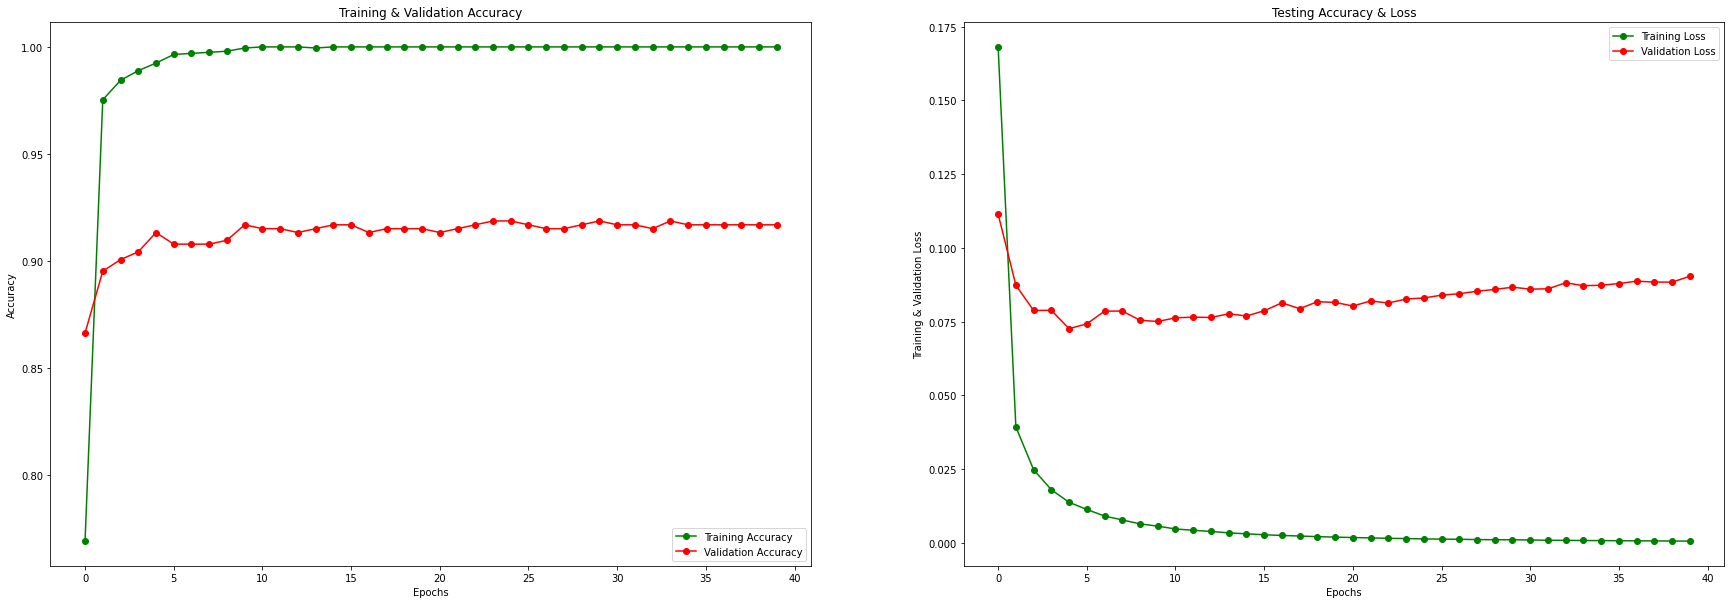

In [9]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [10]:
from keras.callbacks import ReduceLROnPlateau

In [11]:
lr_rate=ReduceLROnPlateau(monitor='val_loss')

In [12]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [13]:
#hist=model.fit_generator(trained_fed, epochs=30, validation_data=test_fed,callbacks=[lr_rate])

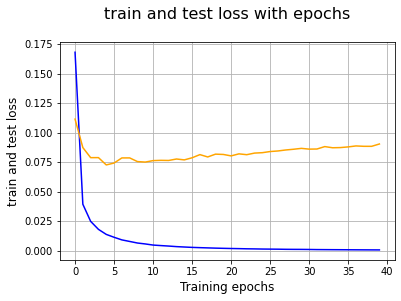

In [14]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("train and test loss with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test loss", fontsize=12)
plt.show()

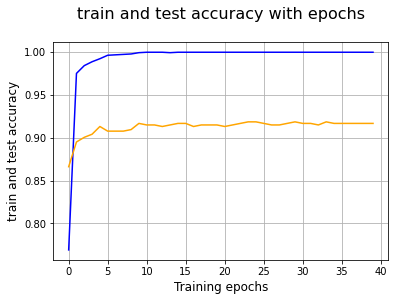

In [15]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("train and test accuracy with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test accuracy", fontsize=12)
plt.show()

In [16]:
accuracy=model.evaluate(test_fed,steps=len(test_fed), verbose=2)
print('%.2f'%(accuracy[1]*100))

18/18 - 8s - loss: 0.5666 - accuracy: 0.9168 - 8s/epoch - 436ms/step
91.68


In [25]:
test_score = model.evaluate_generator(test_fed, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[INFO] accuracy: 91.68%
[INFO] Loss:  0.5666038393974304


In [31]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

      Apple leaves       0.16      0.16      0.16        98
 Strawberry leaves       0.26      0.27      0.26       134
     Tomato leaves       0.27      0.21      0.23       160
             guava       0.20      0.20      0.20        50
 jack fruit leaves       0.05      0.06      0.06        35
             lemon       0.02      0.04      0.02        26
peeple tree leaves       0.09      0.09      0.09        23
 sandalwood leaves       0.00      0.00      0.00        13
             tulsi       0.00      0.00      0.00        14

          accuracy                           0.18       553
         macro avg       0.12      0.11      0.11       553
      weighted avg       0.20      0.18      0.19       553



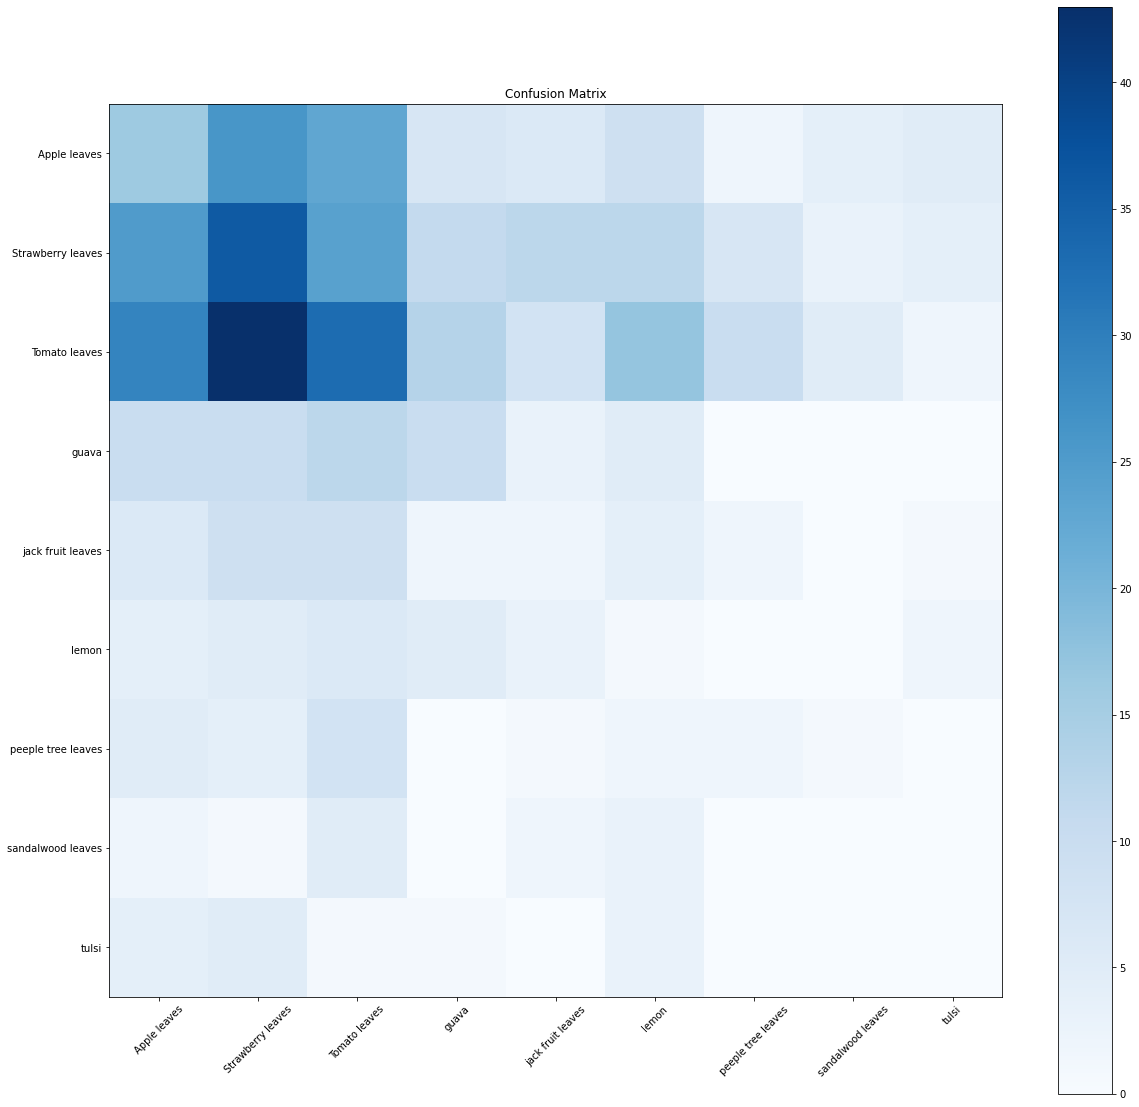

In [32]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.figure(figsize=(20,20))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in trained_fed.class_indices:
  target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_fed)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_fed.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_fed.classes, y_pred, target_names=target_names))